In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import FlowCal as fc
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score
from sklearn.model_selection import GridSearchCV

In [36]:
# extract one data file to inspect a bit
data = fc.io.FCSData('raw_fcs/export_COVID19 samples 23_04_20_ST3_COVID19_HC_005 ST3 230420_016_Live_cells.fcs')
data

FCSData([[ 9.00318359e+04,  7.43407578e+04,  1.52252766e+05, ...,
           1.88942017e+02,  2.19277115e+01,  4.67166281e+00],
         [ 7.20538594e+04,  6.05726289e+04,  1.42608250e+05, ...,
           4.44523659e+01, -5.32419624e+01,  4.69278812e+00],
         [ 7.23818672e+04,  5.58579805e+04,  1.56006875e+05, ...,
           1.26727875e+02,  2.22187676e+04,  4.71388054e+00],
         ...,
         [ 8.53785625e+04,  7.30571250e+04,  1.43832672e+05, ...,
           8.08627472e+01,  8.60250671e+02,  1.06872236e+04],
         [ 9.08346094e+04,  7.70441641e+04,  1.44653594e+05, ...,
           1.71531696e+01,  3.01337097e+02,  1.06872295e+04],
         [ 8.71277969e+04,  7.57242969e+04,  1.44720578e+05, ...,
           5.46009789e+01,  1.53306656e+02,  1.06872695e+04]],
        dtype=float32)

In [37]:
# the data contains 35 rows, which aligns with the information provided
# seems like each row of data contains all the information recorded 
print(data.shape)
print(data.channels)

(363314, 35)
('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'FJComp-APC-A', 'FJComp-APC-H7-A', 'FJComp-APC-R700-A', 'FJComp-BB630-A', 'FJComp-BB660-P-A', 'FJComp-BB700-P-A', 'FJComp-BB790-P-A', 'FJComp-BUV395-A', 'FJComp-BUV496-A', 'FJComp-BUV563-A', 'FJComp-BUV615-P-A', 'FJComp-BUV661-A', 'FJComp-BUV737-A', 'FJComp-BUV805-A', 'FJComp-BV421-A', 'FJComp-BV480-A', 'FJComp-BV570-A', 'FJComp-BV605-A', 'FJComp-BV650-A', 'FJComp-BV711-A', 'FJComp-BV750-P-A', 'FJComp-BV786-A', 'FJComp-BYG584-A', 'FJComp-BYG670-A', 'FJComp-BYG790-A', 'FJComp-FITC-A', 'FJComp-PE-CF594-A', 'FJComp-PE-Cy5.5-A', 'Time')


In [38]:
raw_df=pd.DataFrame(data,columns=data.channels)
df=raw_df.copy()
df

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,FJComp-APC-A,FJComp-APC-H7-A,FJComp-APC-R700-A,FJComp-BB630-A,...,FJComp-BV711-A,FJComp-BV750-P-A,FJComp-BV786-A,FJComp-BYG584-A,FJComp-BYG670-A,FJComp-BYG790-A,FJComp-FITC-A,FJComp-PE-CF594-A,FJComp-PE-Cy5.5-A,Time
0,90031.835938,74340.757812,152252.765625,64099.808594,61537.687500,114026.234375,-108.113541,26.580711,1734.687256,141.600357,...,77.727127,95.443634,-116.704102,122.946114,33.469536,13.926468,44.156185,188.942017,21.927711,4.671663
1,72053.859375,60572.628906,142608.250000,48381.601562,44957.109375,113856.843750,70.300995,-47.643639,1768.578857,86.834747,...,-116.190826,166.855072,251.956665,400.722443,47.160740,482.128815,57.231113,44.452366,-53.241962,4.692788
2,72381.867188,55857.980469,156006.875000,145227.750000,119552.625000,135966.296875,66.121140,179.704117,3254.302979,285.751282,...,-786.465210,126.297493,-74.327057,701.264526,464.061646,-2.510653,82.266296,126.727875,22218.767578,4.713881
3,80129.617188,63219.746094,150459.406250,36682.257812,33110.710938,112568.148438,2842.492676,-36.427006,1602.355469,74.009331,...,554.487122,76.227638,123.358185,55.952389,-220.316254,36.748600,12.774431,-13.396628,98.288010,4.730701
4,98763.421875,80866.140625,146217.375000,52176.207031,48327.941406,115334.773438,80.071861,-13.289043,1782.017578,70.354622,...,67.206955,117.775223,82.504349,505.131775,90.037788,138.649307,894.559509,290.679230,33.324196,4.759384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363309,95130.460938,81036.335938,152046.062500,43022.128906,42273.796875,107963.007812,307.104553,25.756487,827.030518,3026.164551,...,54.053482,-68.304665,223.612030,7.553917,-120.342819,1.963216,8729.230469,-241.707382,150.172333,10687.196289
363310,83057.335938,70456.851562,143512.781250,40002.175781,39913.886719,104850.023438,8.933396,-42.982735,1071.234009,36.039597,...,-9.624137,185.924454,5.993186,80.038452,30.330807,1066.973267,57.694935,128.098511,107.589653,10687.209961
363311,85378.562500,73057.125000,143832.671875,23986.097656,23184.191406,100674.445312,-67.971886,26.527950,2341.642578,-27.800518,...,286.376648,-163.141373,7.245156,115.226578,38.538284,-4.126328,7.925058,80.862747,860.250671,10687.223633
363312,90834.609375,77044.164062,144653.593750,45257.042969,41123.953125,115055.085938,-61.299892,16.442160,1862.344360,75.114372,...,-90.773972,-20.402643,-72.724762,165.070770,55.972393,18.944254,52.395630,17.153170,301.337097,10687.229492


In [39]:
# check if there is any missing values
df.isna().values.any()

False

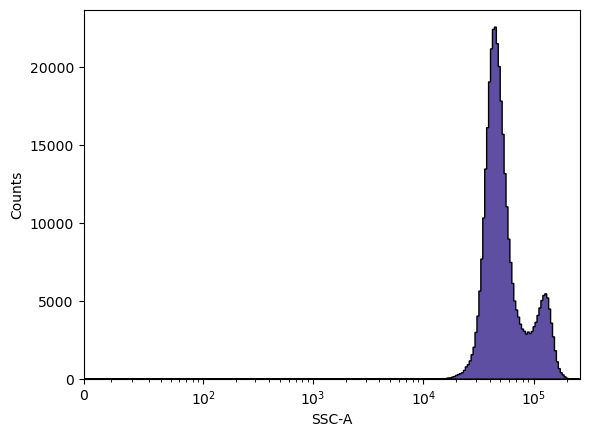

In [40]:
fc.plot.hist1d(data, channel='SSC-A')
plt.show()

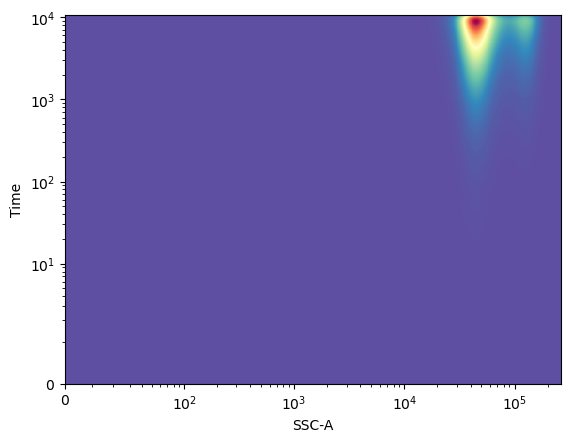

In [41]:
fc.plot.density2d(data, channels=['SSC-A', 'Time'])
plt.show()

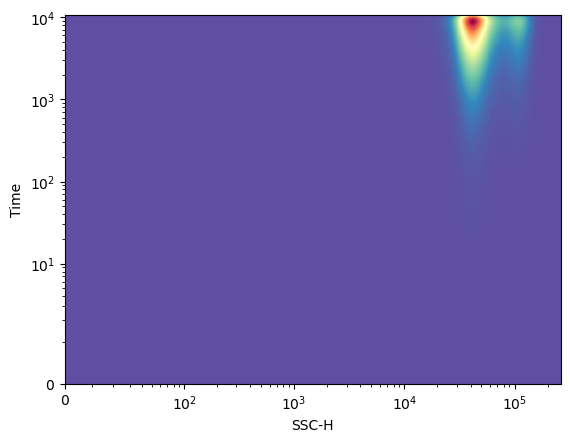

In [42]:
fc.plot.density2d(data, channels=['SSC-H', 'Time'])
plt.show()

In [43]:
# feature extraction for single data
column_stats = df.agg(['mean', 'min', 'max', 'median'])
column_stats

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,FJComp-APC-A,FJComp-APC-H7-A,FJComp-APC-R700-A,FJComp-BB630-A,...,FJComp-BV711-A,FJComp-BV750-P-A,FJComp-BV786-A,FJComp-BYG584-A,FJComp-BYG670-A,FJComp-BYG790-A,FJComp-FITC-A,FJComp-PE-CF594-A,FJComp-PE-Cy5.5-A,Time
min,34308.964844,27766.271484,121543.507812,9385.411133,8974.638672,86993.296875,-93330.976562,-383.226288,-479.190582,-118570.117188,...,-51060.292969,-6400.957520,-1003.214600,-8.502584e+04,-70170.914062,-296.121155,-6568.705078,-119198.281250,-2116.270020,4.671663
max,210290.156250,189928.171875,260692.968750,218799.937500,181892.031250,234528.984375,15816.052734,236.911606,22646.830078,172914.328125,...,21963.839844,12576.303711,3405.897461,2.271936e+06,127783.210938,52144.199219,42998.929688,457087.375000,40289.757812,10687.269531
median,86781.671875,71337.156250,148671.156250,48435.183594,44922.828125,113756.281250,47.657970,17.212559,1634.454834,100.995697,...,176.789856,45.103142,44.708939,1.869438e+02,58.717865,64.899445,84.501526,77.916611,89.443344,5332.649414


In [44]:

column_stats = pd.DataFrame(index=['statistics'])
numeric_columns = df.select_dtypes(include=['number']).columns
# Calculate min, max, median, 25th percentile, and 75th percentile for each column and store in the new DataFrame
for column in numeric_columns:
   # df[column] = pd.to_numeric(df[column], errors='coerce')
   # column_stats[f'{column}_mean'] = df[column].mean()
    column_stats[f'{column}_median'] = df[column].median()
    column_stats[f'{column}_min'] = df[column].min()
    column_stats[f'{column}_max'] = df[column].max()
    column_stats[f'{column}_25th'] = df[column].quantile(0.25)
    column_stats[f'{column}_75th'] = df[column].quantile(0.75)
column_stats

,FSC-A_median,FSC-A_min,FSC-A_max,FSC-A_25th,FSC-A_75th,FSC-H_median,FSC-H_min,FSC-H_max,FSC-H_25th,FSC-H_75th,...,FJComp-PE-Cy5.5-A_median,FJComp-PE-Cy5.5-A_min,FJComp-PE-Cy5.5-A_max,FJComp-PE-Cy5.5-A_25th,FJComp-PE-Cy5.5-A_75th,Time_median,Time_min,Time_max,Time_25th,Time_75th
statistics,86781.671875,34308.964844,210290.15625,78392.460938,95824.46875,71337.15625,27766.271484,189928.171875,64116.529297,79414.636719,...,89.443344,-2116.27002,40289.757812,27.167182,182.419765,5332.649414,4.671663,10687.269531,2654.671143,8012.412354


### applying the preprocessing and feature extraction to all data

In [45]:
def read_fcs_files_and_append_to_list(directory_path):
    fcs_data_list = []  # Create an empty list to store FCSData objects

    # Iterate through all folders and subfolders
    for root, dirs, files in os.walk(directory_path):
        for file_name in files:
            # Check if the file is an FCS file
            if file_name.endswith('.fcs'):
                # Construct the full file path
                file_path = os.path.join(root, file_name)

                try:
                    # Read the FCS file and append FCSData to the list
                    fcs_data = fc.io.FCSData(file_path)
                    fcs_data_list.append(fcs_data)
                    #print(f"Added FCS File to List: {file_path}")
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    return fcs_data_list

In [46]:
def convert_to_dataframe(data,i):
    # convert to dataframe
    df=pd.DataFrame(data,columns=data.channels)
    # check missing values
    missing_values=df.isna().values.any()
    if missing_values==True:
        print(f'Missing value in dataset number {i} detected')
    return df

In [47]:
def extract_features(df,i):
    do_not_extract=['Time','FJComp-BB660-P-A','FJComp-BUV661-A','FJComp-BB790-P-A']
    column_stats = pd.DataFrame(index=['statistics'])
    numeric_columns = df.select_dtypes(include=['number']).columns
    # Calculate min, max, median, 25th percentile, and 75th percentile for each column and store in the new DataFrame
    for column in numeric_columns:
        if column in do_not_extract:
            continue
        column_stats[f'{column}_median'] = df[column].median()
        column_stats[f'{column}_min'] = df[column].min()
        column_stats[f'{column}_max'] = df[column].max()
        column_stats[f'{column}_25th'] = df[column].quantile(0.25)
        column_stats[f'{column}_75th'] = df[column].quantile(0.75)
    if i<13:
        column_stats['Disease']=0
    else:
        column_stats['Disease']=1
            
    
    return column_stats

In [48]:
directory_path = 'raw_fcs/'
all_data=read_fcs_files_and_append_to_list(directory_path)

In [49]:
count=1
extracted_features=pd.DataFrame()
for data in all_data:
    dataframe = convert_to_dataframe(data,count)
    extracted_features=extracted_features.append(extract_features(dataframe,count),ignore_index=True)
    count+=1


In [50]:
extracted_features.head()

,FSC-A_median,FSC-A_min,FSC-A_max,FSC-A_25th,FSC-A_75th,FSC-H_median,FSC-H_min,FSC-H_max,FSC-H_25th,FSC-H_75th,...,FJComp-PE-CF594-A_min,FJComp-PE-CF594-A_max,FJComp-PE-CF594-A_25th,FJComp-PE-CF594-A_75th,FJComp-PE-Cy5.5-A_median,FJComp-PE-Cy5.5-A_min,FJComp-PE-Cy5.5-A_max,FJComp-PE-Cy5.5-A_25th,FJComp-PE-Cy5.5-A_75th,Disease
0,86781.671875,34308.964844,210290.156250,78392.460938,95824.468750,71337.156250,27766.271484,189928.171875,64116.529297,79414.636719,...,-119198.281250,457087.375000,-3.043472,180.233746,89.443344,-2116.270020,40289.757812,27.167182,182.419765,0
1,79618.359375,33455.996094,209250.203125,68289.421875,89325.843750,65239.210938,25249.498047,188443.609375,56431.242188,73618.236328,...,-12998.416992,343556.500000,20.268230,225.335766,81.543945,-7009.796387,22467.941406,13.677646,253.203869,0
2,86781.671875,34308.964844,210290.156250,78392.460938,95824.468750,71337.156250,27766.271484,189928.171875,64116.529297,79414.636719,...,-119198.281250,457087.375000,-3.043472,180.233746,89.443344,-2116.270020,40289.757812,27.167182,182.419765,0
3,79618.359375,33455.996094,209250.203125,68289.421875,89325.843750,65239.210938,25249.498047,188443.609375,56431.242188,73618.236328,...,-12998.416992,343556.500000,20.268230,225.335766,81.543945,-7009.796387,22467.941406,13.677646,253.203869,0
4,85901.898438,34418.871094,207854.015625,79143.507812,93404.023438,70416.570312,18315.023438,188055.484375,64411.671875,77403.445312,...,-20312.533203,49061.535156,14.130414,184.968048,80.873421,-1252.881348,28343.457031,27.070601,158.177979,0


<Axes: xlabel='Disease', ylabel='count'>

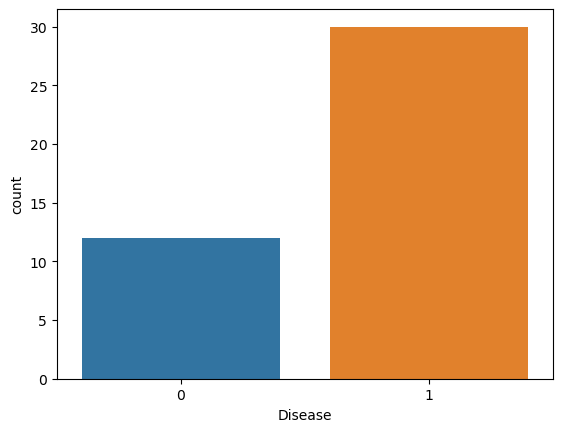

In [51]:
sns.countplot(extracted_features,x='Disease')

<Axes: xlabel='FSC-A_median', ylabel='FJComp-PE-Cy5.5-A_median'>

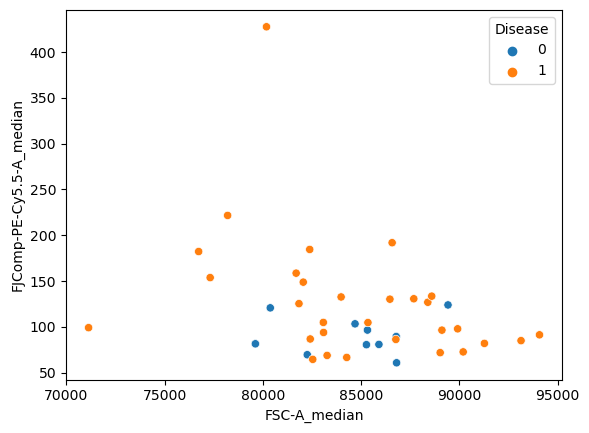

In [52]:
sns.scatterplot(x='FSC-A_median',y='FJComp-PE-Cy5.5-A_median',data=extracted_features,hue='Disease')

In [53]:
# the data is a bit imbalanced, ususally I'll take some actions here (upsampling,downsampling,SMOTE,etc).
# but since it's not too imbalanced and that this dataset is really small, I'll leave it like this for now

## applying machine learning

In [54]:
X=extracted_features.drop(['Disease'],axis=1)
y=extracted_features['Disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=9)


In [55]:
# here I do not have much domain knowledge about FSC data, and that given the feature extracted it may not be the best 
# to do regressive model here, I choose to do a tree-based method.
# Also the dataset is way too small to do any deep learning here.

In [56]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [57]:
# the accuracy score is decent, but the f-1 score is quite low.
# Judging from the confusion matrix, the model only classified 1 healthy case correctly.
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'F-1 score: {f1_score(y_test,y_pred)}')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.7272727272727273
F-1 score: 0.823529411764706
Confusion Matrix
[[1 2]
 [1 7]]


In [58]:
# take a look at the metrics that usually matters most in disease classification-Recall
print(f'Recall: {recall_score(y_test,y_pred)}')

Recall: 0.875


In [59]:
# do a bit of hyperparam tuning
param_grid={
    'max_depth':[3,5,7,9],
    'gamma':np.linspace(0,1,6),
    'eta':[0.3,0.6,0.9]
}

In [60]:
xgb2=XGBClassifier()
grid=GridSearchCV(xgb2,param_grid)
grid.fit(X_train,y_train)
grid.best_params_

{'eta': 0.6, 'gamma': 0.6000000000000001, 'max_depth': 3}

In [61]:
xgb2=XGBClassifier(eta=.6,gamma=.6,max_depth=3)
xgb2.fit(X_train,y_train)
y_pred=xgb2.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'F-1 score: {f1_score(y_test,y_pred)}')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print(f'Recall: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7272727272727273
F-1 score: 0.823529411764706
Confusion Matrix
[[1 2]
 [1 7]]
Recall: 0.875


In [62]:
# The result showed the same. Since the dataset is too small and according to the question,
# too much tuning may not help much.
# Usually I will do some error analysis afterwards.